In [3]:
import os
os.listdir("data")


['titanic3.xlsx', '.ipynb_checkpoints']

In [4]:
!pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)


In [5]:
import pandas as pd
df = pd.read_excel("data/titanic3.xlsx")
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_excel("data/titanic3.xlsx")
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
datos = df[['pclass','survived','sex','age','sibsp','parch','embarked']]
datos.head()


,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2.0000,1,2,S
3,1,0,male,30.0000,1,2,S
4,1,0,female,25.0000,1,2,S


In [9]:
datos['age'] = datos['age'].fillna(datos['age'].median())


In [10]:
bins = [-np.inf,15,25,35,45,55,65,75,np.inf]
labels = ["0-15","16-25","26-35","36-45","46-55","56-65","66-75","76-85"]

datos['Fac_Edad'] = pd.cut(datos['age'], bins=bins, labels=labels)


In [11]:
datos['pclass'] = datos['pclass'].astype('category')
datos['survived'] = datos['survived'].astype('category')
datos['sex'] = datos['sex'].astype('category')
datos['embarked'] = datos['embarked'].astype('category')
datos['Fac_Edad'] = datos['Fac_Edad'].astype('category')


In [12]:
print("Media:", datos['age'].mean())
print("Mediana:", datos['age'].median())
print("Varianza:", datos['age'].var())
print("Desviación:", datos['age'].std())


Media: 29.50318311688312
Mediana: 28.0
Varianza: 166.54538210008934
Desviación: 12.905246301411273


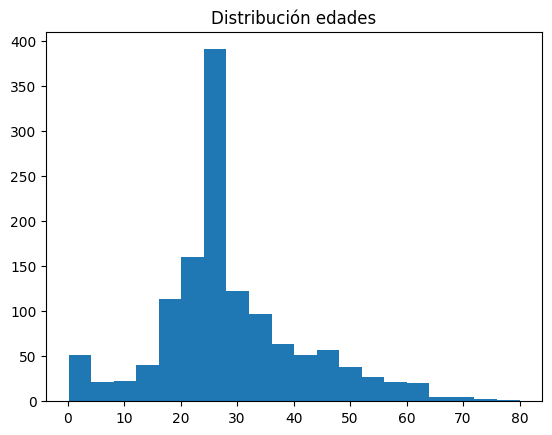

In [13]:
plt.hist(datos['age'], bins=20)
plt.title("Distribución edades")
plt.show()


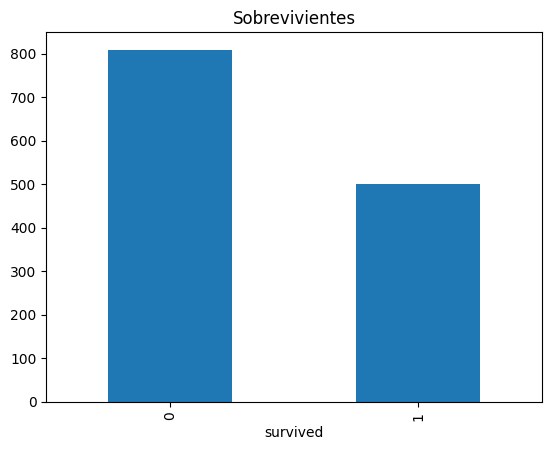

In [14]:
datos['survived'].value_counts().plot(kind='bar')
plt.title("Sobrevivientes")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = datos[['pclass','age']]
X = pd.get_dummies(X)

y = datos['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3, random_state=1024)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train,y_train)

pred = modelo.predict(X_test)


In [16]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[222  32]
 [ 72  67]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       254
           1       0.68      0.48      0.56       139

    accuracy                           0.74       393
   macro avg       0.72      0.68      0.69       393
weighted avg       0.73      0.74      0.72       393

